# Hypothesis Generation

1-**problem statement:**

predictive model that finds the sales of each product at a particular store.

2- **Hypothesis Generation Based On Various Factors**:


**outlet establishment year**: 

this may affect the sales as the outlet may be popular and known to customers 

**product type**:

customers may be drawn into certain product types than the others or products that are heavily consumed such as daily  products
or any products related to food

**outlet location**:

location will certainly affect sales because different locations have different customer numbers which means more or less sales
it also may indicate the buying habits of these customers
example: people living in Alaska will indeed have different buying habits than people living in New York

**outlet size**:

if the size of the outlet is too small this means that it has somehow limited products than a large-sized outlet which
will have higher variety and thus , contribute to more sales

**product price**:

high-priced products can sometimes negatively affect sales and vice versa for low-priced products


# Hypothesis Testing

1- stating the hypothesis:

    the outlet sales depends on the outlet size
    
2- Null hypothesis:

    the outlet sales does not depend on the outlet size
    
   Alternate Hypothesis:
   
    the outlet sales depends on the outlet size
    
3- Z-statistics will be used because the sample size is >30

4- level of significance will be 0.1

5-calculate the test statistics

6-calulate p-value for test statistics

7- compare p-value with alpha(level of significance)

# Loading Packages and Data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data frame to import data sets
# train data will be divided into training and tests
# r because python takes everything in the forward slash"/
df_train= pd.read_csv(r'D:\cert , cv , interns\technocolabs\Train.csv')
df_test= pd.read_csv(r'D:\cert , cv , interns\technocolabs\Test.csv')

# Data Structure and Content

In [3]:
df_train.head()
# returns the first 5 rows
#1- data manipulation is done as data is already in a csv format
# 2- we don't need to do data blending as it merges data from multiple sources into one data but in our  case we don't have multiple data for training
# 3- we also need to handle missing values because we have null("Nan") entries

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

# Exploratory Data Analysis

In [4]:
df_train.isnull().sum()
# to check for null values
# missing values are 2410 rows we can drop or fill these values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [6]:
df_train.info()
# print the data types of item_weight, outlet_size to fill them accordingly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# we can fill item_weight using mean and outlet_size using mode
df_train.describe()
# describe() tells the statistical info

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [8]:
df_train['Item_Weight'].describe()
# without describe() it prints the column values only 

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [9]:
# to fill them 
# inplace is used to replace it permenantely
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace= True)
df_test['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace= True)
# we should do the same for test data

In [10]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
df_train['Outlet_Size']
# outlet size is a categorical column that is why we will use mode Imputation
# while item_weight is a numerical column so we fill it with mean imputation

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [12]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
df_train['Item_Weight'].value_counts()

12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.275000        2
7.685000        1
9.420000        1
6.520000        1
5.400000        1
Name: Item_Weight, Length: 416, dtype: int64

# Missing Value Treatment

In [14]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace= True)

In [15]:
df_train['Outlet_Size'].mode()
# index of medium is 0, and of small is 1 and of high is 2

0    Medium
Name: Outlet_Size, dtype: object

In [16]:
df_train.isnull().sum()
# now all null values have been filled

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Univariate Analysis

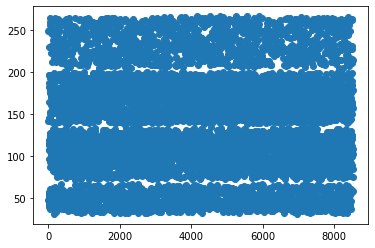

In [18]:
plt.scatter(df_train.index,df_train['Item_MRP'])
plt.show()

<AxesSubplot: ylabel='Item_MRP'>

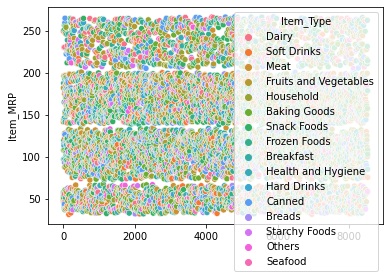

In [19]:
sns.scatterplot(x= df_train.index, y=df_train['Item_MRP'],hue=df_train['Item_Type'])

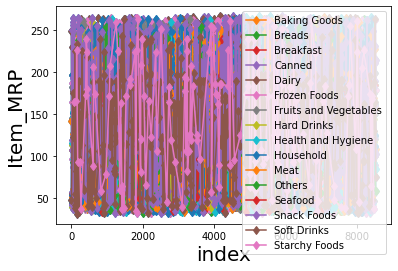

In [20]:

plt.xlabel('index',fontsize=20)
plt.ylabel('Item_MRP',fontsize=20)
plt.plot(df_train.index,df_train['Item_MRP'],markevery=1,marker='d')
for name, group, in df_train.groupby('Item_Type'):
    plt.plot(group.index,group['Item_MRP'],label= name,markevery=1, marker='d')
plt.legend()
plt.show()

In [21]:
sns.set(rc={'figure.figsize':(7,7)})
sns.set(font_scale=1.5)

[Text(0.5, 0, 'index')]

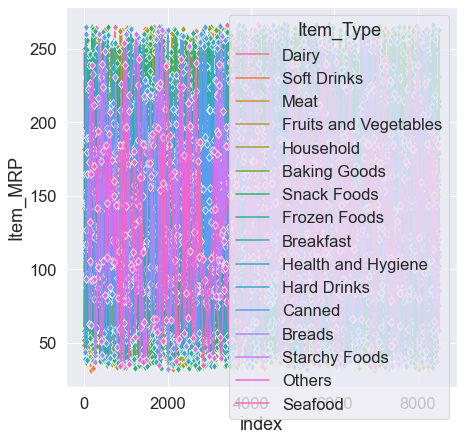

In [22]:
fig= sns.lineplot(x= df_train.index , y= df_train['Item_MRP'],markevery=1,marker='d',data=df_train,hue= df_train['Item_Type'])
fig.set(xlabel='index')

<AxesSubplot: ylabel='Item_Visibility'>

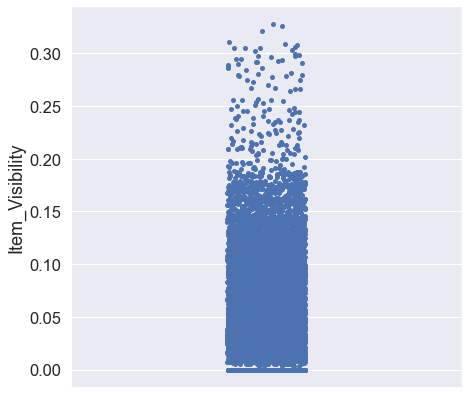

In [23]:
sns.stripplot(y= df_train['Item_Visibility'])

<AxesSubplot: xlabel='Item_Type', ylabel='Item_Visibility'>

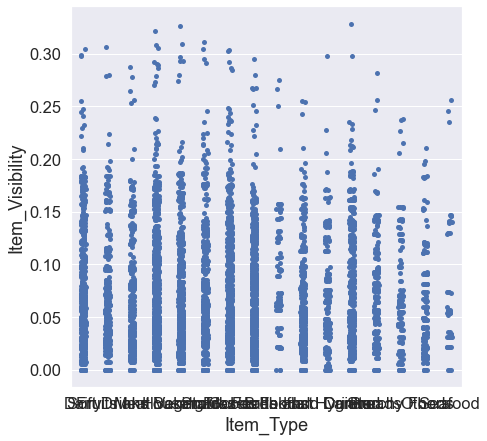

In [24]:
sns.stripplot(x= df_train['Item_Type'],y=df_train['Item_Visibility'])

(array([ 923.,  573., 1053., 1248.,  804., 1098., 1200.,  480.,  557.,
         587.]),
 array([ 31.29   ,  54.84984,  78.40968, 101.96952, 125.52936, 149.0892 ,
        172.64904, 196.20888, 219.76872, 243.32856, 266.8884 ]),
 <BarContainer object of 10 artists>)

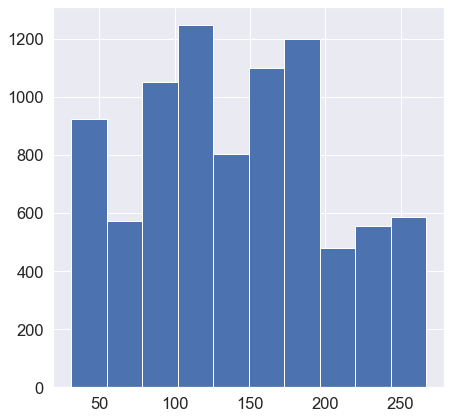

In [25]:
plt.hist(df_train['Item_MRP'])

<AxesSubplot: ylabel='Density'>

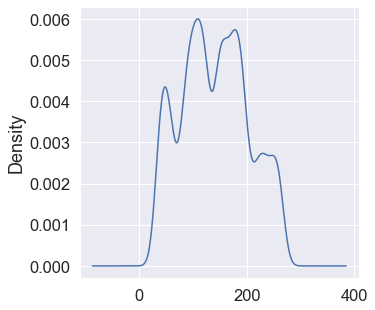

In [26]:
plt.figure(figsize=(5,5))
df_train['Item_MRP'].plot(kind= 'density')

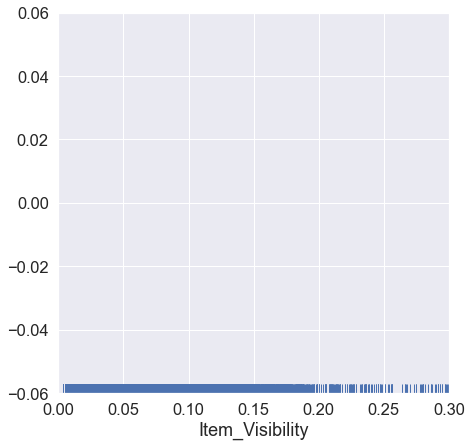

In [27]:
fig, ax= plt.subplots()
sns.rugplot(df_train['Item_Visibility'])
ax.set_xlim(0,0.3)
plt.show()

<AxesSubplot: >

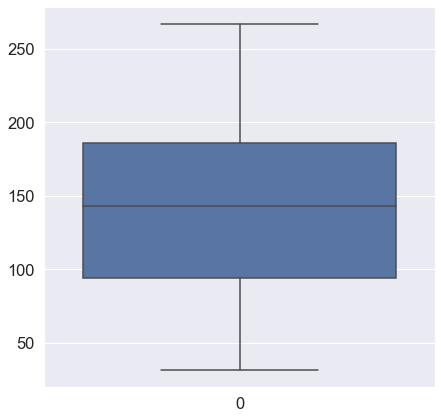

In [28]:
sns.boxplot(df_train['Item_MRP'])

C:\Users\Farida\AppData\Local\Temp\ipykernel_12652\1629480607.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Item_MRP'],color='black',rug=True)


<AxesSubplot: xlabel='Item_MRP', ylabel='Density'>

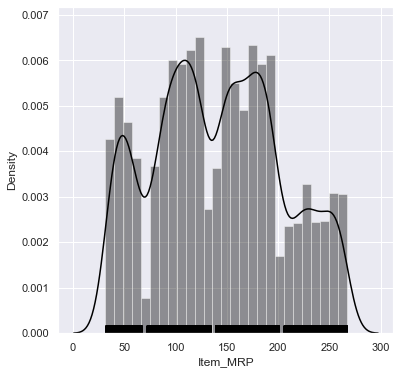

In [29]:
sns.set(rc={'figure.figsize':(6,6)})
sns.distplot(df_train['Item_MRP'],color='black',rug=True)

<AxesSubplot: >

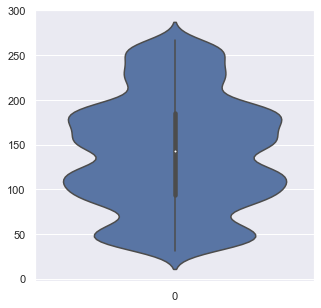

In [30]:
sns.set(rc={'figure.figsize':(5,5)})
sns.violinplot(df_train['Item_MRP'],orient='vertical')

<AxesSubplot: >

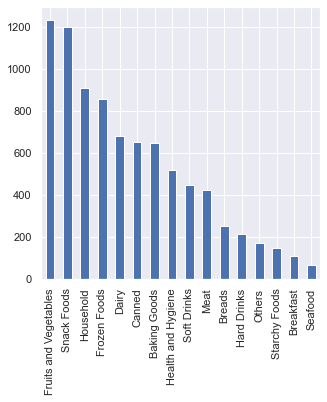

In [31]:
df_train['Item_Type'].value_counts().plot.bar()

([<matplotlib.patches.Wedge at 0x211a3b14a00>,
 [Text(0.9885134290668446, 0.4825362168319687, ''),
  Text(0.24030971243089047, 1.0734296633274967, ''),
  Text(-0.5819825343166728, 0.9334325523305597, ''),
  Text(-1.0285786969861261, 0.3899049423979169, ''),
  Text(-1.077062377695873, -0.22346506338153288, ''),
  Text(-0.8447302131430985, -0.7045785030805407, ''),
  Text(-0.42586341218777557, -1.0142190858782856, ''),
  Text(0.03628228530275769, -1.099401471607715, ''),
  Text(0.4168746716474865, -1.0179467118365286, ''),
  Text(0.716494856094164, -0.83464670441487, ''),
  Text(0.900194282333554, -0.6321789731191458, ''),
  Text(0.994829306903044, -0.46937687429911723, ''),
  Text(1.0509763124562066, -0.3247287955447658, ''),
  Text(1.0816671190247293, -0.19999060883137015, ''),
  Text(1.0957698794777586, -0.0963761963832281, ''),
  Text(1.0996939326750943, -0.025947147002808594, '')])

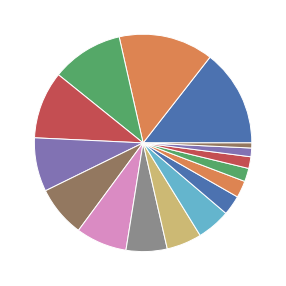

In [32]:
plt.pie(df_train['Item_Type'].value_counts())

# Bivariate Analysis

Text(0, 0.5, 'item_outlet_sales')

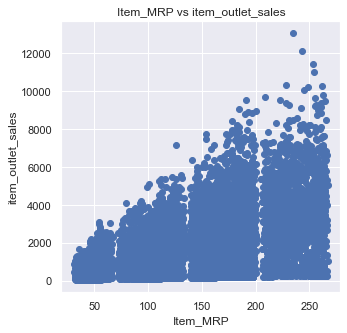

In [33]:

plt.scatter(df_train['Item_MRP'], df_train['Item_Outlet_Sales'])
plt.title('Item_MRP vs item_outlet_sales')
plt.xlabel('Item_MRP')
plt.ylabel('item_outlet_sales')

In [34]:
df_train.corr()

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.012049  0.024756   
Item_Visibility              -0.012049         1.000000 -0.001315   
Item_MRP                      0.024756        -0.001315  1.000000   
Outlet_Establishment_Year    -0.008301        -0.074834  0.005020   
Item_Outlet_Sales             0.011550        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.008301           0.011550  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000

In [35]:
# now we are done with 3- missing values handling
# 4-feature generation :generating more columns but in these project we don't need to do so
# 5- dimensionality reduction : reducing column size of data
# 6-feature selection:selecting importatnt features


# Feature Engineering

In [36]:
groups = ['Low', 'Med', 'High', 'Exp']
df_train['Item_MRP_Bin_qcut'] = pd.qcut(df_train['Item_MRP'], q=4, labels=groups)
df_train[['Item_MRP', 'Item_MRP_Bin_qcut']].head()

Item_MRP Item_MRP_Bin_qcut
0  249.8092               Exp
1   48.2692               Low
2  141.6180               Med
3  182.0950              High
4   53.8614               Low

In [37]:
df_train['Item_Code'] = df_train['Item_Identifier'].apply(lambda x: x[0:2])
df_train[['Item_Identifier', 'Item_Code']].head()

Item_Identifier Item_Code
0           FDA15        FD
1           DRC01        DR
2           FDN15        FD
3           FDX07        FD
4           NCD19        NC

In [38]:
# Frequency encoding using value_counts function 
Item_Type_freq = df_train['Item_Type'].value_counts(normalize=True)

df_train['Item_Type_freq'] = df_train['Item_Type'].apply(lambda x : Item_Type_freq[x])

print('The sum of Item_Type_freq variable:', sum(Item_Type_freq))
df_train[['Item_Type', 'Item_Type_freq']].head(6)

The sum of Item_Type_freq variable: 1.0


Item_Type  Item_Type_freq
0                  Dairy        0.080019
1            Soft Drinks        0.052212
2                   Meat        0.049865
3  Fruits and Vegetables        0.144550
4              Household        0.106770
5           Baking Goods        0.076030

In [39]:
df_train['Item_Outlet_Sales_Mean'] =df_train.groupby(['Item_Identifier', 'Item_Type'])['Item_Outlet_Sales']\
                                     .transform(lambda x: x.mean())

df_train[['Item_Identifier','Item_Type','Item_Outlet_Sales','Item_Outlet_Sales_Mean']].tail()

Item_Identifier           Item_Type  Item_Outlet_Sales  \
8518           FDF22         Snack Foods          2778.3834   
8519           FDS36        Baking Goods           549.2850   
8520           NCJ29  Health and Hygiene          1193.1136   
8521           FDN46         Snack Foods          1845.5976   
8522           DRG01         Soft Drinks           765.6700   

      Item_Outlet_Sales_Mean  
8518             3232.542225  
8519             2636.568000  
8520             1221.521067  
8521             2067.752867  
8522             1225.072000

In [40]:
# 6-feature selection: we will remove item_identifier and outlet_identifier
# because sales are not dependent on them

In [41]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1, inplace = True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1, inplace = True)
# # axis = 1 for columns


In [42]:
df_train.head()

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         0.016047                  Dairy   
1         5.92          Regular         0.019278            Soft Drinks   
2        17.50          Low Fat         0.016760                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93          Low Fat         0.000000              Household   

   Item_MRP  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0  249.8092                       1999      Medium               Tier 1   
1   48.2692                       2009      Medium               Tier 3   
2  141.6180                       1999      Medium               Tier 1   
3  182.0950                       1998      Medium               Tier 3   
4   53.8614                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales Item_MRP_Bin_qcut Item_Code  \
0  Supermarket Type1          3735.1380               Exp        FD   
1  Supermarket Type2           443.4228               Low        DR   
2  Supermarket Type1          2097.2700               Med        FD   
3      Grocery Store           732.3800              High        FD   
4  Supermarket Type1           994.7052               Low        NC   

   Item_Type_freq  Item_Outlet_Sales_Mean  
0        0.080019             5198.067050  
1        0.052212              862.211000  
2        0.049865             1478.076000  
3        0.144550             3021.067500  
4        0.106770              653.926567

In [43]:
# EDA:exploratory data analysis
# we need to explore if there's any outlier or not

In [44]:
# EDA with dtale library 
import dtale

In [45]:
dtale.show(df_train)
# Q-Qplot shows whether data is normally distributed blue line will be in red line
# if data is rarely normally distributed , blue line will lie on red line
# in our case our data is not normally distributed
# data is ranging from 5- 20 from the plot in "describe"
# if there's an outlier we will find a data >20 or <5
# if we have outliers , we use median imputation otherwise we stick with mean with numerical values

In [46]:
#100 outliers detected in item_visibility from dtale
def remove_outlier(col):
    sorted(col)
    Q1,Q3= col.quantile([.25,.75])
    IQR= Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range= Q3+(1.5*IQR)
    return lower_range,upper_range

In [47]:
lowvisibility,highvisibility= remove_outlier(df_train['Item_Visibility'])
df_train['Item_Visibility']=np.where(df_train['Item_Visibility']>highvisibility,highvisibility,df_train['Item_Visibility'])
df_train['Item_Visibility']=np.where(df_train['Item_Visibility']<lowvisibility,lowvisibility,df_train['Item_Visibility'])


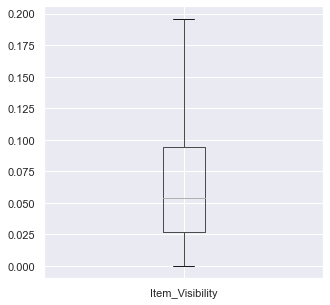

In [48]:
df_train.boxplot(column=['Item_Visibility'])
plt.show()

In [49]:
# EDA using pandas profiling 
from pandas_profiling import ProfileReport

2023-03-06 11:33:35,144 - INFO     - Pandas backend loaded 1.4.4
2023-03-06 11:33:35,352 - INFO     - Numpy backend loaded 1.22.4
2023-03-06 11:33:35,352 - INFO     - Pyspark backend NOT loaded
2023-03-06 11:33:35,360 - INFO     - Python backend loaded
C:\Users\Farida\AppData\Local\Temp\ipykernel_12652\3183693488.py:2: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



In [50]:
profile = ProfileReport(df_train, title= "Pandas Profiling Report")

In [51]:
profile
# this can show if 2 variables are correlated this means they are the same and hence we can drop either of them
# this is also called feature selection
# ex: if x and y is correlated with 70% we drop either 
# if two items are correlated in negative we don't drop any , this means x is inc and y is dec or vice versa
# don't compare correlations with the output variable(sales)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

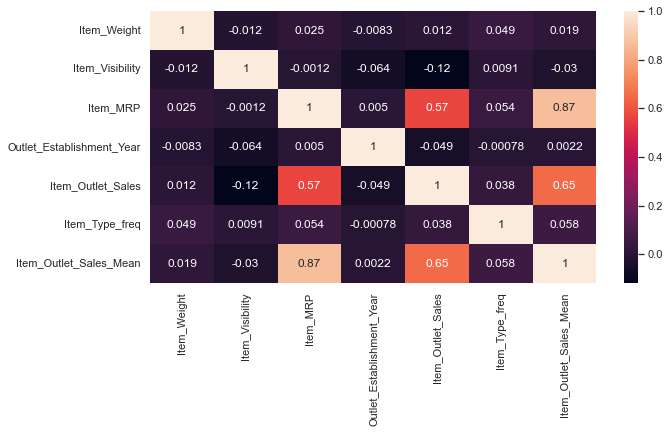

In [52]:
plt.figure(figsize=(10,5)) 
# to adjust the figure size
sns.heatmap(df_train.corr(),annot = True)
# annotate wrote the values on the plot (on the squares)
plt.show()

In [53]:
import klib

GridSpec(6, 7)

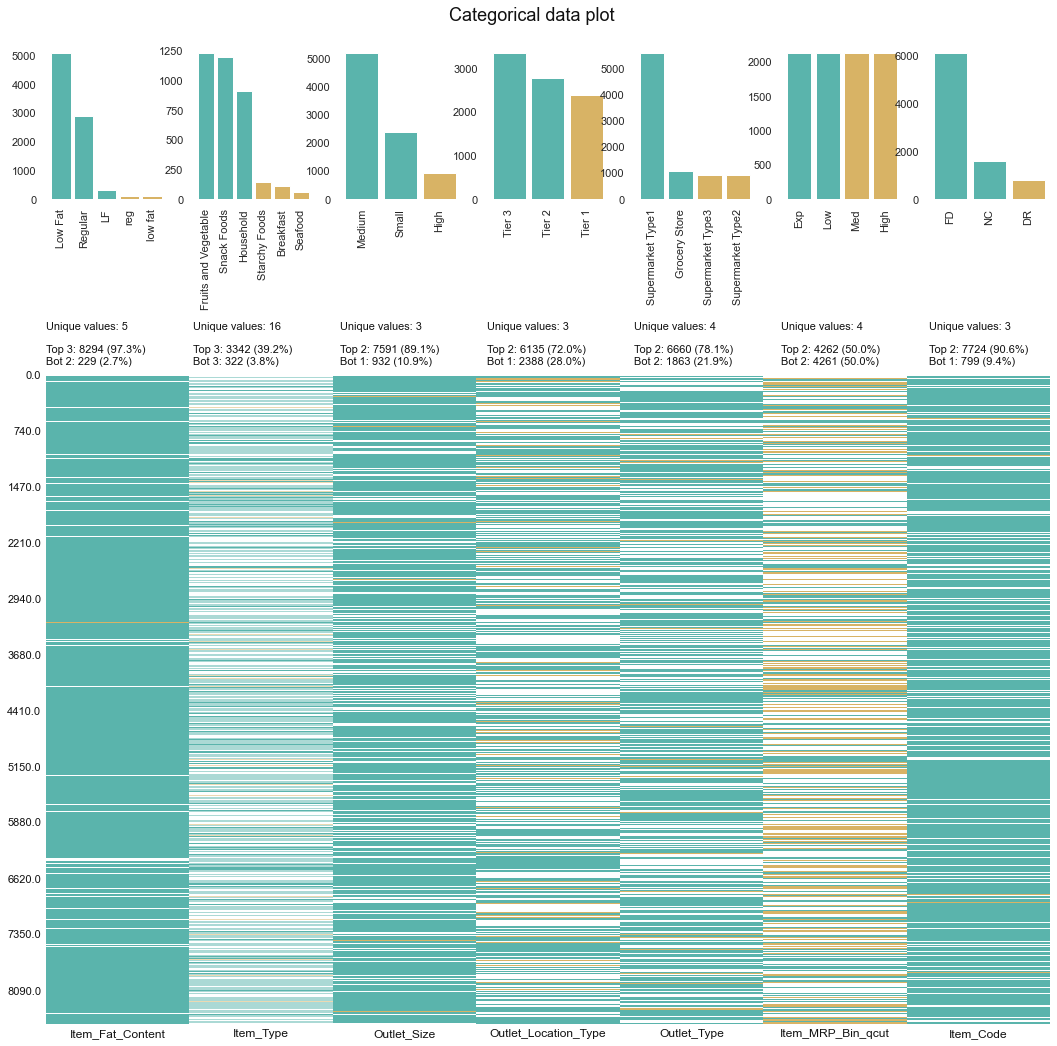

In [54]:
 klib.cat_plot(df_train) # returns a visualization of the number and frequency of categorical features

<AxesSubplot: xlabel='Item_Outlet_Sales_Mean', ylabel='Density'>

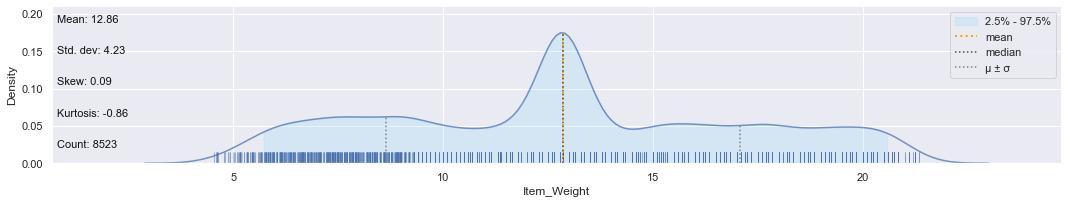

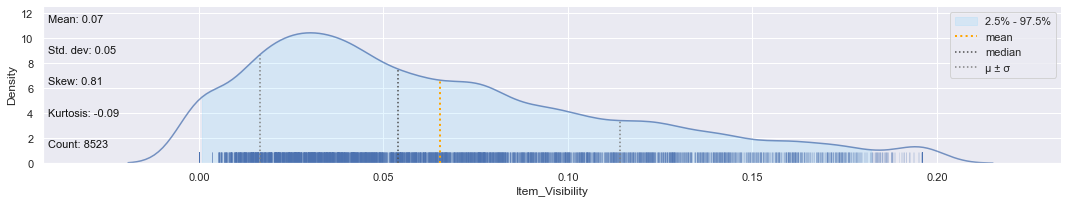

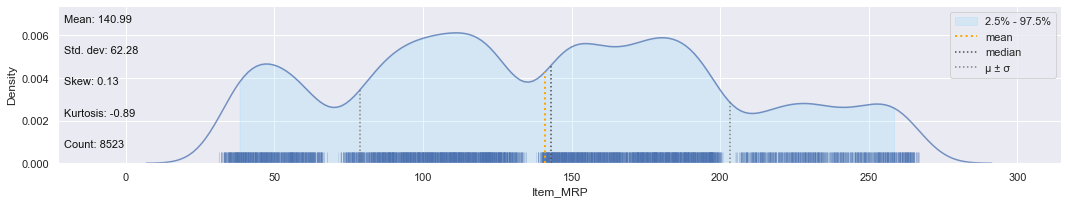

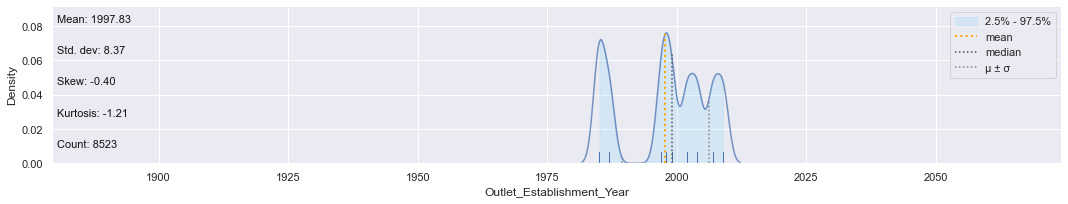

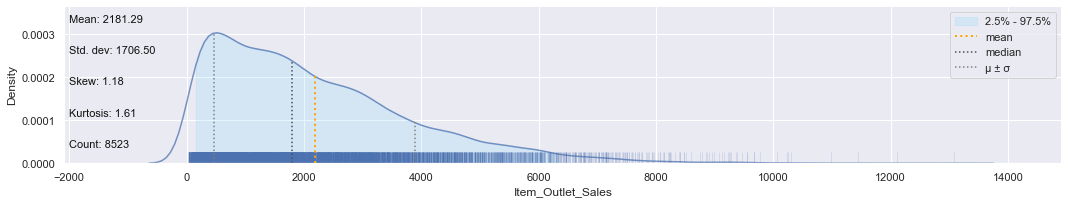

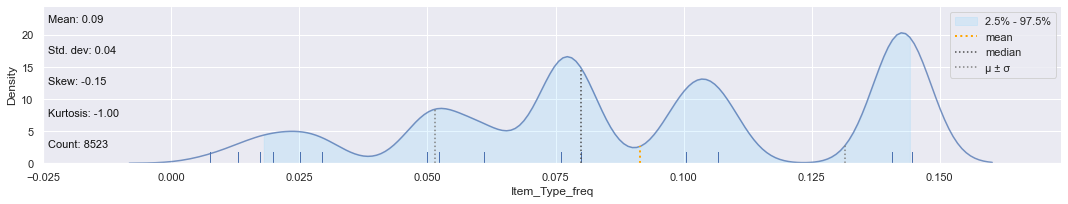

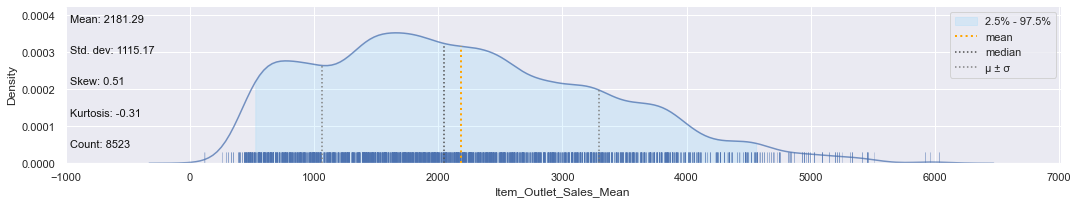

In [55]:
klib.dist_plot(df_train) # returns a distribution plot for every numeric feature

In [56]:
klib.missingval_plot(df_train) # returns a figure containing information about missing values

No missing values found in the dataset.


In [57]:
# data cleaning
klib.data_cleaning(df_train) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)
# that lead to only memory reduction as we previously removed null values

Shape of cleaned data: (8523, 14) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.58 MB (-68.24%)



item_weight item_fat_content  item_visibility              item_type  \
0        9.300000          Low Fat         0.016047                  Dairy   
1        5.920000          Regular         0.019278            Soft Drinks   
2       17.500000          Low Fat         0.016760                   Meat   
3       19.200001          Regular         0.000000  Fruits and Vegetables   
4        8.930000          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518     6.865000          Low Fat         0.056783            Snack Foods   
8519     8.380000          Regular         0.046982           Baking Goods   
8520    10.600000          Low Fat         0.035186     Health and Hygiene   
8521     7.210000          Regular         0.145221            Snack Foods   
8522    14.800000          Low Fat         0.044878            Soft Drinks   

        item_mrp  outlet_establishment_year outlet_size outlet_location_type  \
0     249.809204                       1999      Medium               Tier 1   
1      48.269199                       2009      Medium               Tier 3   
2     141.617996                       1999      Medium               Tier 1   
3     182.095001                       1998      Medium               Tier 3   
4      53.861401                       1987        High               Tier 3   
...          ...                        ...         ...                  ...   
8518  214.521805                       1987        High               Tier 3   
8519  108.156998                       2002      Medium               Tier 2   
8520   85.122398                       2004       Small               Tier 2   
8521  103.133202                       2009      Medium               Tier 3   
8522   75.467003                       1997       Small               Tier 1   

            outlet_type  item_outlet_sales item_mrp_bin_qcut item_code  \
0     Supermarket Type1        3735.137939               Exp        FD   
1     Supermarket Type2         443.422791               Low        DR   
2     Supermarket Type1        2097.270020               Med        FD   
3         Grocery Store         732.380005              High        FD   
4     Supermarket Type1         994.705200               Low        NC   
...                 ...                ...               ...       ...   
8518  Supermarket Type1        2778.383301               Exp        FD   
8519  Supermarket Type1         549.284973               Med        FD   
8520  Supermarket Type1        1193.113647               Low        NC   
8521  Supermarket Type2        1845.597656               Med        FD   
8522  Supermarket Type1         765.669983               Low        DR   

      item_type_freq  item_outlet_sales_mean  
0           0.080019             5198.066895  
1           0.052212              862.210999  
2           0.049865             1478.076050  
3           0.144550             3021.067383  
4           0.106770              653.926575  
...              ...                     ...  
8518        0.140795             3232.542236  
8519        0.076030             2636.568115  
8520        0.061011             1221.521118  
8521        0.140795             2067.752930  
8522        0.052212             1225.072021  

[8523 rows x 14 columns]

In [58]:
klib.clean_column_names(df_train) # cleans and standardizes column names, also called inside data_cleaning()

item_weight item_fat_content  item_visibility              item_type  \
0           9.300          Low Fat         0.016047                  Dairy   
1           5.920          Regular         0.019278            Soft Drinks   
2          17.500          Low Fat         0.016760                   Meat   
3          19.200          Regular         0.000000  Fruits and Vegetables   
4           8.930          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518        6.865          Low Fat         0.056783            Snack Foods   
8519        8.380          Regular         0.046982           Baking Goods   
8520       10.600          Low Fat         0.035186     Health and Hygiene   
8521        7.210          Regular         0.145221            Snack Foods   
8522       14.800          Low Fat         0.044878            Soft Drinks   

      item_mrp  outlet_establishment_year outlet_size outlet_location_type  \
0     249.8092                       1999      Medium               Tier 1   
1      48.2692                       2009      Medium               Tier 3   
2     141.6180                       1999      Medium               Tier 1   
3     182.0950                       1998      Medium               Tier 3   
4      53.8614                       1987        High               Tier 3   
...        ...                        ...         ...                  ...   
8518  214.5218                       1987        High               Tier 3   
8519  108.1570                       2002      Medium               Tier 2   
8520   85.1224                       2004       Small               Tier 2   
8521  103.1332                       2009      Medium               Tier 3   
8522   75.4670                       1997       Small               Tier 1   

            outlet_type  item_outlet_sales item_mrp_bin_qcut item_code  \
0     Supermarket Type1          3735.1380               Exp        FD   
1     Supermarket Type2           443.4228               Low        DR   
2     Supermarket Type1          2097.2700               Med        FD   
3         Grocery Store           732.3800              High        FD   
4     Supermarket Type1           994.7052               Low        NC   
...                 ...                ...               ...       ...   
8518  Supermarket Type1          2778.3834               Exp        FD   
8519  Supermarket Type1           549.2850               Med        FD   
8520  Supermarket Type1          1193.1136               Low        NC   
8521  Supermarket Type2          1845.5976               Med        FD   
8522  Supermarket Type1           765.6700               Low        DR   

      item_type_freq  item_outlet_sales_mean  
0           0.080019             5198.067050  
1           0.052212              862.211000  
2           0.049865             1478.076000  
3           0.144550             3021.067500  
4           0.106770              653.926567  
...              ...                     ...  
8518        0.140795             3232.542225  
8519        0.076030             2636.568000  
8520        0.061011             1221.521067  
8521        0.140795             2067.752867  
8522        0.052212             1225.072000  

[8523 rows x 14 columns]

In [59]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                8523 non-null   float64 
 1   item_fat_content           8523 non-null   object  
 2   item_visibility            8523 non-null   float64 
 3   item_type                  8523 non-null   object  
 4   item_mrp                   8523 non-null   float64 
 5   outlet_establishment_year  8523 non-null   int64   
 6   outlet_size                8523 non-null   object  
 7   outlet_location_type       8523 non-null   object  
 8   outlet_type                8523 non-null   object  
 9   item_outlet_sales          8523 non-null   float64 
 10  item_mrp_bin_qcut          8523 non-null   category
 11  item_code                  8523 non-null   object  
 12  item_type_freq             8523 non-null   float64 
 13  item_outlet_sales_mean     8523 n

In [60]:
df_train=klib.convert_datatypes(df_train) # converts existing to more efficient dtypes, also called inside data_cleaning()
# reduces memory as well
df_train.info()
# item_weight was float 64 now float 32 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                8523 non-null   float32 
 1   item_fat_content           8523 non-null   category
 2   item_visibility            8523 non-null   float32 
 3   item_type                  8523 non-null   category
 4   item_mrp                   8523 non-null   float32 
 5   outlet_establishment_year  8523 non-null   int16   
 6   outlet_size                8523 non-null   category
 7   outlet_location_type       8523 non-null   category
 8   outlet_type                8523 non-null   category
 9   item_outlet_sales          8523 non-null   float32 
 10  item_mrp_bin_qcut          8523 non-null   category
 11  item_code                  8523 non-null   category
 12  item_type_freq             8523 non-null   float32 
 13  item_outlet_sales_mean     8523 n

In [61]:
 klib.pool_duplicate_subsets(df_train) # pools subset of cols based on duplicates with min. loss of information

item_weight  item_visibility    item_mrp  item_outlet_sales  \
0        9.300000         0.016047  249.809204        3735.137939   
1        5.920000         0.019278   48.269199         443.422791   
2       17.500000         0.016760  141.617996        2097.270020   
3       19.200001         0.000000  182.095001         732.380005   
4        8.930000         0.000000   53.861401         994.705200   
...           ...              ...         ...                ...   
8518     6.865000         0.056783  214.521805        2778.383301   
8519     8.380000         0.046982  108.156998         549.284973   
8520    10.600000         0.035186   85.122398        1193.113647   
8521     7.210000         0.145221  103.133202        1845.597656   
8522    14.800000         0.044878   75.467003         765.669983   

      item_outlet_sales_mean  pooled_vars  
0                5198.066895            0  
1                 862.210999            1  
2                1478.076050            2  
3                3021.067383            3  
4                 653.926575            4  
...                      ...          ...  
8518             3232.542236          782  
8519             2636.568115          107  
8520             1221.521118         2142  
8521             2067.752930          185  
8522             1225.072021          126  

[8523 rows x 6 columns]

## preprocessing task before model building

## label encoding

In [62]:
# label encoding converts "low fat ", "medium" ...etc into zeros 1's and 2's
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
# for category data types only

In [63]:
df_train['item_fat_content']= le.fit_transform(df_train['item_fat_content'])
df_train['item_type']= le.fit_transform(df_train['item_type'])
df_train['outlet_size']= le.fit_transform(df_train['outlet_size'])
df_train['outlet_location_type']= le.fit_transform(df_train['outlet_location_type'])
df_train['outlet_type']= le.fit_transform(df_train['outlet_type'])


In [64]:
df_train.head()

item_weight  item_fat_content  item_visibility  item_type    item_mrp  \
0     9.300000                 1         0.016047          4  249.809204   
1     5.920000                 2         0.019278         14   48.269199   
2    17.500000                 1         0.016760         10  141.617996   
3    19.200001                 2         0.000000          6  182.095001   
4     8.930000                 1         0.000000          9   53.861401   

   outlet_establishment_year  outlet_size  outlet_location_type  outlet_type  \
0                       1999            1                     0            1   
1                       2009            1                     2            2   
2                       1999            1                     0            1   
3                       1998            1                     2            0   
4                       1987            0                     2            1   

   item_outlet_sales item_mrp_bin_qcut item_code  item_type_freq  \
0        3735.137939               Exp        FD        0.080019   
1         443.422791               Low        DR        0.052212   
2        2097.270020               Med        FD        0.049865   
3         732.380005              High        FD        0.144550   
4         994.705200               Low        NC        0.106770   

   item_outlet_sales_mean  
0             5198.066895  
1              862.210999  
2             1478.076050  
3             3021.067383  
4              653.926575

## one hot encoding

In [65]:
df_train= pd.get_dummies(df_train,columns=['item_fat_content','item_type','outlet_size','outlet_location_type','outlet_type'])

In [66]:
df_train

item_weight  item_visibility    item_mrp  outlet_establishment_year  \
0        9.300000         0.016047  249.809204                       1999   
1        5.920000         0.019278   48.269199                       2009   
2       17.500000         0.016760  141.617996                       1999   
3       19.200001         0.000000  182.095001                       1998   
4        8.930000         0.000000   53.861401                       1987   
...           ...              ...         ...                        ...   
8518     6.865000         0.056783  214.521805                       1987   
8519     8.380000         0.046982  108.156998                       2002   
8520    10.600000         0.035186   85.122398                       2004   
8521     7.210000         0.145221  103.133202                       2009   
8522    14.800000         0.044878   75.467003                       1997   

      item_outlet_sales item_mrp_bin_qcut item_code  item_type_freq  \
0           3735.137939               Exp        FD        0.080019   
1            443.422791               Low        DR        0.052212   
2           2097.270020               Med        FD        0.049865   
3            732.380005              High        FD        0.144550   
4            994.705200               Low        NC        0.106770   
...                 ...               ...       ...             ...   
8518        2778.383301               Exp        FD        0.140795   
8519         549.284973               Med        FD        0.076030   
8520        1193.113647               Low        NC        0.061011   
8521        1845.597656               Med        FD        0.140795   
8522         765.669983               Low        DR        0.052212   

      item_outlet_sales_mean  item_fat_content_0  ...  outlet_size_0  \
0                5198.066895                   0  ...              0   
1                 862.210999                   0  ...              0   
2                1478.076050                   0  ...              0   
3                3021.067383                   0  ...              0   
4                 653.926575                   0  ...              1   
...                      ...                 ...  ...            ...   
8518             3232.542236                   0  ...              1   
8519             2636.568115                   0  ...              0   
8520             1221.521118                   0  ...              0   
8521             2067.752930                   0  ...              0   
8522             1225.072021                   0  ...              0   

      outlet_size_1  outlet_size_2  outlet_location_type_0  \
0                 1              0                       1   
1                 1              0                       0   
2                 1              0                       1   
3                 1              0                       0   
4                 0              0                       0   
...             ...            ...                     ...   
8518              0              0                       0   
8519              1              0                       0   
8520              0              1                       0   
8521              1              0                       0   
8522              0              1                       1   

      outlet_location_type_1  outlet_location_type_2  outlet_type_0  \
0                          0                       0              0   
1                          0                       1              0   
2                          0                       0              0   
3                          0                       1              1   
4                          0                       1              0   
...                      ...                     ...            ...   
8518                       0                       1              0   
8519                       1                      

# splitting our data into train and test

In [67]:
X= df_train.drop('item_outlet_sales',axis=1)

In [68]:
Y= df_train['item_outlet_sales']

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test= train_test_split(X,Y,random_state= 101,test_size=0.2)

In [70]:
X_test

item_weight  item_visibility    item_mrp  outlet_establishment_year  \
8179    11.000000         0.055163  100.335800                       2009   
8355    18.000000         0.038979  148.641800                       1987   
3411     7.720000         0.074731   77.598602                       1997   
7089    20.700001         0.049035   39.950600                       2007   
6954     7.550000         0.027225  152.934006                       2002   
...           ...              ...         ...                        ...   
1317    16.750000         0.105019  155.263000                       1999   
4996     8.520000         0.027059  153.368195                       1997   
531     15.600000         0.111686  184.792404                       1998   
3891    17.100000         0.000000  114.685997                       2009   
6629     6.260000         0.009888  150.736603                       2002   

     item_mrp_bin_qcut item_code  item_type_freq  item_outlet_sales_mean  \
8179               Med        NC        0.061011             1281.831421   
8355              High        FD        0.140795             2697.599609   
3411               Low        FD        0.029450             1184.058716   
7089               Low        FD        0.144550              556.608826   
6954              High        FD        0.076147             2411.860596   
...                ...       ...             ...                     ...   
1317              High        FD        0.140795             2386.060791   
4996              High        DR        0.052212             1611.806641   
531               High        NC        0.019829             2344.503662   
3891               Med        NC        0.106770             1665.451172   
6629              High        FD        0.049865             2176.366943   

      item_fat_content_0  item_fat_content_1  ...  outlet_size_0  \
8179                   0                   1  ...              0   
8355                   0                   1  ...              1   
3411                   0                   0  ...              0   
7089                   0                   1  ...              0   
6954                   0                   1  ...              0   
...                  ...                 ...  ...            ...   
1317                   0                   1  ...              0   
4996                   0                   1  ...              0   
531                    0                   1  ...              0   
3891                   0                   1  ...              0   
6629                   0                   0  ...              0   

      outlet_size_1  outlet_size_2  outlet_location_type_0  \
8179              1              0                       0   
8355              0              0                       0   
3411              0              1                       1   
7089              1              0                       0   
6954              1              0                       0   
...             ...            ...                     ...   
1317              1              0                       1   
4996              0              1                       1   
531               1              0                       0   
3891              1              0                       0   
6629              1              0                       0   

      outlet_location_type_1  outlet_location_type_2  outlet_type_0  \
8179                       0                       1              0   
8355                       0                       1              0   
3411                       0                       0              0   
7089                       1                       0              0   
6954                       1                       0              0   
...                      ...                     ...            ...   
1317                       0                       0              0   
4996                       0          

In [71]:
X_train

item_weight  item_visibility    item_mrp  outlet_establishment_year  \
3684    19.250000         0.101689   54.695599                       1987   
1935     7.630000         0.061410   94.643600                       2007   
5142    19.350000         0.065891  167.081604                       2007   
4978     6.380000         0.031898  177.434402                       1997   
2299    16.700001         0.022110  110.888603                       2002   
...           ...              ...         ...                        ...   
599      5.000000         0.044005  188.852997                       1997   
5695    14.650000         0.170664   56.461399                       2002   
8006    12.500000         0.018849   96.738403                       1997   
1361     9.695000         0.129009  226.940399                       2007   
1547    15.700000         0.161317   57.556198                       2009   

     item_mrp_bin_qcut item_code  item_type_freq  item_outlet_sales_mean  \
3684               Low        FD        0.080019              746.139893   
1935               Med        DR        0.052212             1418.154053   
5142              High        FD        0.049865             2488.760498   
4978              High        FD        0.080019             2248.273438   
2299               Med        FD        0.080019             1842.553955   
...                ...       ...             ...                     ...   
599                Exp        DR        0.052212             3567.356445   
5695               Low        DR        0.025109              795.764160   
8006               Med        NC        0.061011             1790.114258   
1361               Exp        FD        0.076030             3632.794922   
1547               Low        NC        0.106770              651.818176   

      item_fat_content_0  item_fat_content_1  ...  outlet_size_0  \
3684                   0                   1  ...              1   
1935                   0                   1  ...              0   
5142                   0                   0  ...              0   
4978                   1                   0  ...              0   
2299                   0                   1  ...              0   
...                  ...                 ...  ...            ...   
599                    0                   1  ...              0   
5695                   0                   1  ...              0   
8006                   0                   1  ...              0   
1361                   0                   0  ...              0   
1547                   0                   1  ...              0   

      outlet_size_1  outlet_size_2  outlet_location_type_0  \
3684              0              0                       0   
1935              1              0                       0   
5142              1              0                       0   
4978              0              1                       1   
2299              1              0                       0   
...             ...            ...                     ...   
599               0              1                       1   
5695              1              0                       0   
8006              0              1                       1   
1361              1              0                       0   
1547              1              0                       0   

      outlet_location_type_1  outlet_location_type_2  outlet_type_0  \
3684                       0                       1              0   
1935                       1                       0              0   
5142                       1                       0              0   
4978                       0                       0              0   
2299                       1                       0              0   
...                      ...                     ...            ...   
599                        0                       0              0   
5695                       1          

## standardization

In [72]:
# our data set is ranging from 4 to 4955 so we need to normalize it
# where the mean will be zero and std=1 
X.describe()
# the difference in mean between each column is very high

item_weight  item_visibility     item_mrp  outlet_establishment_year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     12.857646         0.065307   140.992767                1997.831867   
std       4.226124         0.048841    62.275066                   8.371760   
min       4.555000         0.000000    31.290001                1985.000000   
25%       9.310000         0.026989    93.826500                1987.000000   
50%      12.857645         0.053931   143.012802                1999.000000   
75%      16.000000         0.094585   185.643700                2004.000000   
max      21.350000         0.195979   266.888397                2009.000000   

       item_type_freq  item_outlet_sales_mean  item_fat_content_0  \
count     8523.000000             8523.000000         8523.000000   
mean         0.091537             2181.289062            0.037076   
std          0.040082             1115.166382            0.188960   
min          0.007509              110.966667            0.000000   
25%          0.061011             1326.273560            0.000000   
50%          0.080019             2050.664062            0.000000   
75%          0.140795             2936.177979            0.000000   
max          0.144550             6035.310547            1.000000   

       item_fat_content_1  item_fat_content_2  item_fat_content_3  ...  \
count         8523.000000         8523.000000         8523.000000  ...   
mean             0.597090            0.338965            0.013141  ...   
std              0.490512            0.473386            0.113885  ...   
min              0.000000            0.000000            0.000000  ...   
25%              0.000000            0.000000            0.000000  ...   
50%              1.000000            0.000000            0.000000  ...   
75%              1.000000            1.000000            0.000000  ...   
max              1.000000            1.000000            1.000000  ...   

       outlet_size_0  outlet_size_1  outlet_size_2  outlet_location_type_0  \
count    8523.000000    8523.000000    8523.000000             8523.000000   
mean        0.109351       0.610466       0.280183                0.280183   
std         0.312098       0.487673       0.449115                0.449115   
min         0.000000       0.000000       0.000000                0.000000   
25%         0.000000       0.000000       0.000000                0.000000   
50%         0.000000       1.000000       0.000000                0.000000   
75%         0.000000       1.000000       1.000000                1.000000   
max         1.000000       1.000000       1.000000                1.000000   

       outlet_location_type_1  outlet_location_type_2  outlet_type_0  \
count             8523.000000             8523.000000    8523.000000   
mean                 0.326763                0.393054       0.127068   
std                  0.469057                0.488457       0.333069   
min                  0.000000                0.000000       0.000000   
25%                  0.000000                0.000000       0.000000   
50%                  0.000000                0.000000       0.000000   
75%                  1.000000                1.000000       0.000000   
max                  1.000000                1.000000       1.000000   

       outlet_type_1  outlet_type_2  outlet_type_3  
count    8523.000000    8523.000000    8523.000000  
mean        0.654347       0.108882       0.109703  
std         0.475609       0.311509       0.312538  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         1.000000       0.000000       0.000000  
75%         1.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000  

[8 rows x 37 columns]

In [73]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [74]:
X_train_std= sc.fit_transform(X_train)
# fit means learning how the data is distributed in x_train and then transform it

ValueError: could not convert string to float: 'Low'

In [ ]:
X_test_std= sc.transform(X_test)
# fit means learning how the data is distributed in x_test and then transform it

In [ ]:
X_train_std

In [ ]:
X_test_std

In [ ]:
Y_train

In [ ]:
Y_test

## Model building

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train_std,Y_train)

In [ ]:
X_test.head()

In [ ]:
Y_pred_lr=lr.predict(X_test_std)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
r2_score(Y_test,Y_pred_lr)

In [ ]:
mean_absolute_error(Y_test,Y_pred_lr)
# ytruth- predtruth
# example: ytruth = 2000 , predtruth= 1500 
# or ytruth = 2000, predtruth = 2500

In [ ]:
np.sqrt(mean_squared_error(Y_test,Y_pred_lr))

## Regularized Linear Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Create a Ridge regression model
alpha = 0.5  # Regularization strength
model = Ridge(alpha=alpha)

In [ ]:
# Fit the model to the training data
model.fit(X_train, Y_train)


In [ ]:
# Predict on the test data
y_pred = model.predict(X_test)


In [ ]:

# Calculate the mean squared error
mse = mean_squared_error(Y_test, y_pred)
print('MSE:', mse)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [ ]:
rf.fit(X_train,Y_train)
# random forest doesn't need x_train_std

In [ ]:
Y_pred_rf=rf.predict(X_test)

In [ ]:
r2_score(Y_test,Y_pred_rf)

In [ ]:
mean_absolute_error(Y_test,Y_pred_rf)

In [ ]:
np.sqrt(mean_squared_error(Y_test,Y_pred_rf))

# XgBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(X_train, Y_train)

In [ ]:

y_pred = model.predict(X_test)

# calculate the mean squared error of the predictions
mse = mean_squared_error(Y_test, y_pred)

print("Mean Squared Error:", mse)


Executing shutdown due to inactivity...


2023-03-06 12:33:36,369 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2023-03-06 12:33:44,752 - INFO     - Executing shutdown...


Exception on /shutdown [GET]
Traceback (most recent call last):
  File "C:\Users\Farida\anaconda3\envs\newenv\lib\site-packages\flask\app.py", line 2528, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\Farida\anaconda3\envs\newenv\lib\site-packages\flask\app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\Farida\anaconda3\envs\newenv\lib\site-packages\flask\app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\Farida\anaconda3\envs\newenv\lib\site-packages\flask\app.py", line 1799, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "C:\Users\Farida\anaconda3\envs\newenv\lib\site-packages\dtale\app.py", line 435, in shutdown
    shutdown_server()
  File "C:\Users\Farida\anaconda3\envs\newenv\lib\site-packages\dtale\app.py", line 421, in shutdown_server
    raise RuntimeError("Not running with the Werkzeug Server")
Runtime

2023-03-06 12:33:44,760 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "C:\Users\Farida\anaconda3\envs\newenv\lib\site-packages\flask\app.py", line 2528, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\Farida\anaconda3\envs\newenv\lib\site-packages\flask\app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\Farida\anaconda3\envs\newenv\lib\site-packages\flask\app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\Farida\anaconda3\envs\newenv\lib\site-packages\flask\app.py", line 1799, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "C:\Users\Farida\anaconda3\envs\newenv\lib\site-packages\dtale\app.py", line 435, in shutdown
    shutdown_server()
  File "C:\Users\Farida\anaconda3\envs\newenv\lib\site-packages\dtale\app.py", line 421, in shutdown_server
    raise RuntimeError("Not runni